# Task 1
Il primo task consiste nel classificare i casi normali e anormali.

Importazione di train_data_aggregated.pkl

In [145]:
import os
import pandas as pd

path_dataframes = os.path.join("..", "dataset", "dataframes")
file_path = os.path.join(path_dataframes, "train_data_aggregated_split.pkl")

df_train_aggregated = pd.read_pickle(file_path)

df_train_aggregated.head(10)

,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,...,P7_time_line_integral,P7_time_min,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID
0,1,Normal,100,100,100,100,No,No,No,No,...,784.906580,0.017144,5.013518,5020.028779,65.000000,26930.154869,501.116403,11.633031,1,1
1,1,Normal,100,100,100,100,No,No,No,No,...,787.373792,-0.002641,5.016796,5610.686996,65.000000,26048.487157,508.501184,11.441019,1,2
2,1,Normal,100,100,100,100,No,No,No,No,...,789.525599,-0.003006,5.017115,5325.708422,64.837905,26122.284330,501.853078,11.428535,1,3
3,1,Normal,100,100,100,100,No,No,No,No,...,785.214600,-0.002262,4.994830,5071.356039,65.000000,27028.792007,505.424186,11.654316,2,1
4,1,Normal,100,100,100,100,No,No,No,No,...,787.175441,-0.003732,4.999298,5609.065086,65.000000,26860.719421,520.657365,11.618024,2,2
5,1,Normal,100,100,100,100,No,No,No,No,...,789.849227,-0.003786,4.999330,5395.867067,64.837905,26738.190739,514.925045,11.562480,2,3
6,1,Normal,100,100,100,100,No,No,No,No,...,786.680915,0.010210,4.997008,5181.622967,65.000000,28666.730785,530.555213,12.002247,3,1
7,1,Normal,100,100,100,100,No,No,No,No,...,788.757285,-0.007141,5.000936,5574.134844,65.000000,28078.041431,526.628711,11.878370,3,2
8,1,Normal,100,100,100,100,No,No,No,No,...,789.123312,0.010275,5.000849,4752.645196,64.837905,28205.943559,512.604069,11.875593,3,3
9,1,Normal,100,100,100,100,No,No,No,No,...,784.801259,0.023904,5.003661,4887.806746,65.000000,26236.857132,486.386530,11.482313,4,1


In [146]:
print(len(df_train_aggregated))

531


In [147]:
print("Colonne del Dataframe:")
print(df_train_aggregated.columns)

Colonne del Dataframe:
Index(['Spacecraft', 'Condition', 'SV1', 'SV2', 'SV3', 'SV4', 'BP1', 'BP2',
       'BP3', 'BP4',
       ...
       'P7_time_line_integral', 'P7_time_min', 'P7_time_max',
       'P7_freq_peak_value', 'P7_freq_peak_freq', 'P7_freq_sum_power_spectrum',
       'P7_freq_std_power_spectrum', 'P7_freq_rms_freq', 'Case', 'Window_ID'],
      dtype='object', length=107)


Rimuoviamo le colonne che non servono

In [148]:
cols_to_drop = ["Spacecraft", "Window_ID", "SV1", "SV2", "SV3", "SV4", 
                "BP1", "BP2", "BP3", "BP4", "BP5", "BP6", "BP7", "BV1", "Case"]

df_train_aggregated = df_train_aggregated.drop(columns=cols_to_drop)
print("Colonne dopo la rimozione:")
print(df_train_aggregated.columns)

Colonne dopo la rimozione:
Index(['Condition', 'P1_time_mean', 'P1_time_median', 'P1_time_p25',
       'P1_time_p75', 'P1_time_variance', 'P1_time_line_integral',
       'P1_time_min', 'P1_time_max', 'P1_freq_peak_value', 'P1_freq_peak_freq',
       'P1_freq_sum_power_spectrum', 'P1_freq_std_power_spectrum',
       'P1_freq_rms_freq', 'P2_time_mean', 'P2_time_median', 'P2_time_p25',
       'P2_time_p75', 'P2_time_variance', 'P2_time_line_integral',
       'P2_time_min', 'P2_time_max', 'P2_freq_peak_value', 'P2_freq_peak_freq',
       'P2_freq_sum_power_spectrum', 'P2_freq_std_power_spectrum',
       'P2_freq_rms_freq', 'P3_time_mean', 'P3_time_median', 'P3_time_p25',
       'P3_time_p75', 'P3_time_variance', 'P3_time_line_integral',
       'P3_time_min', 'P3_time_max', 'P3_freq_peak_value', 'P3_freq_peak_freq',
       'P3_freq_sum_power_spectrum', 'P3_freq_std_power_spectrum',
       'P3_freq_rms_freq', 'P4_time_mean', 'P4_time_median', 'P4_time_p25',
       'P4_time_p75', 'P4_time_var

Creaiamo la colonna BinaryCondition: 0 per "Normal", 1 per "Fault" o "Anomaly"

In [149]:
df_train_aggregated["BinaryCondition"] = df_train_aggregated["Condition"].apply(
    lambda x: 0 if x == "Normal" else 1
)

# Elimina la colonna "Condition"
df_train_aggregated = df_train_aggregated.drop(columns=["Condition"])

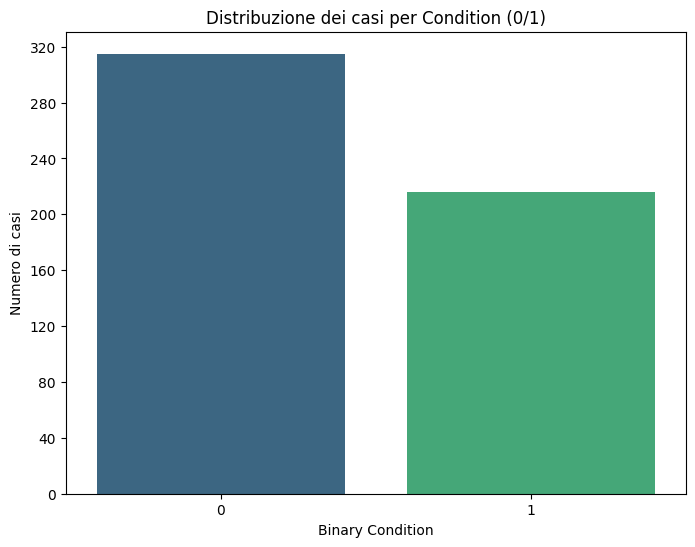

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

plt.figure(figsize=(8,6))
ax = sns.countplot(x='BinaryCondition', data=df_train_aggregated, hue='BinaryCondition', palette='viridis', dodge=False)
ax.legend_.remove()  # Rimuove la legenda perché hue è uguale a x
plt.xlabel("Binary Condition")
plt.ylabel("Numero di casi")
plt.title("Distribuzione dei casi per Condition (0/1)")
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Assicura tick interi sull'asse y
plt.show()

In [151]:
# Stampa il DataFrame aggiornato
print(df_train_aggregated.columns)

Index(['P1_time_mean', 'P1_time_median', 'P1_time_p25', 'P1_time_p75',
       'P1_time_variance', 'P1_time_line_integral', 'P1_time_min',
       'P1_time_max', 'P1_freq_peak_value', 'P1_freq_peak_freq',
       'P1_freq_sum_power_spectrum', 'P1_freq_std_power_spectrum',
       'P1_freq_rms_freq', 'P2_time_mean', 'P2_time_median', 'P2_time_p25',
       'P2_time_p75', 'P2_time_variance', 'P2_time_line_integral',
       'P2_time_min', 'P2_time_max', 'P2_freq_peak_value', 'P2_freq_peak_freq',
       'P2_freq_sum_power_spectrum', 'P2_freq_std_power_spectrum',
       'P2_freq_rms_freq', 'P3_time_mean', 'P3_time_median', 'P3_time_p25',
       'P3_time_p75', 'P3_time_variance', 'P3_time_line_integral',
       'P3_time_min', 'P3_time_max', 'P3_freq_peak_value', 'P3_freq_peak_freq',
       'P3_freq_sum_power_spectrum', 'P3_freq_std_power_spectrum',
       'P3_freq_rms_freq', 'P4_time_mean', 'P4_time_median', 'P4_time_p25',
       'P4_time_p75', 'P4_time_variance', 'P4_time_line_integral',
       

Per scegliere le migliori feature da utilizzare per l'addestramento adottiamo un approccio supervisionato basato sull’ANOVA F-value. 

In pratica, utilizziamo la funzione f_classif (disponibile in scikit-learn) per valutare, per ogni feature, quanto essa discrimini tra le classi (in questo caso la variabile target “BinaryCondition”).

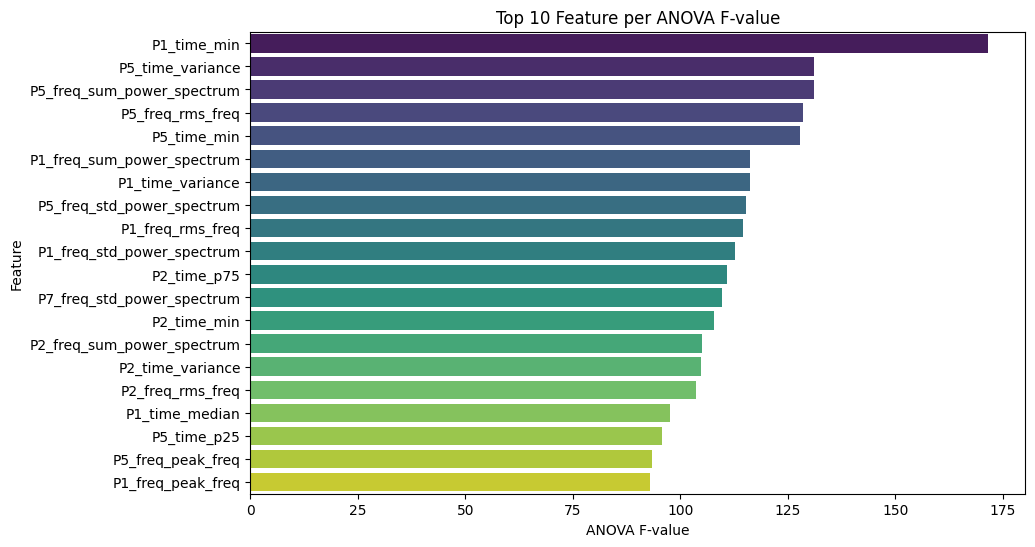

In [152]:
import pandas as pd
from sklearn.feature_selection import f_classif, SelectKBest
import matplotlib.pyplot as plt
import seaborn as sns

# Separo le feature e il target
X = df_train_aggregated.drop(columns=['BinaryCondition'])
y = df_train_aggregated['BinaryCondition']

# Calcolo gli F-value e i p-value per ogni feature
f_values, p_values = f_classif(X, y)

# Creo un DataFrame che riassume i risultati
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_value': f_values,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

top_10 = feature_scores.head(20)

# Feature con punteggio F-value più alto
plt.figure(figsize=(10, 6))
sns.barplot(x='F_value', y='Feature', data=top_10, hue='Feature', palette='viridis', dodge=False)
plt.xlabel("ANOVA F-value")
plt.ylabel("Feature")
plt.title("Top 10 Feature per ANOVA F-value")
plt.show()

# Selezione automatica delle migliori feature usando SelectKBest
selector = SelectKBest(score_func=f_classif, k=5) 
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]


Salviamo selected_feature (lista delle 20 feature migliori secondo ANOVA F-value) in formato .pkl

In [153]:
import pickle

with open("selected_features.pkl", "wb") as f:
    pickle.dump(selected_features.tolist(), f)

Siamo pronti per applicare l'algoritmo di classificazione (Random Forest)

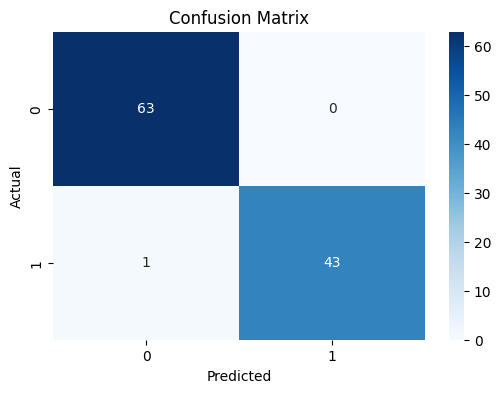

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.98      0.99        44

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107

Accuracy: 0.9906542056074766


In [154]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Separazione delle feature e del target
X = df_train_aggregated[selected_features]
y = df_train_aggregated["BinaryCondition"]

# 2. Divisione in training e test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Addestramento del modello Random Forest con class_weight='balanced'
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 4. Previsione sul test set
y_pred = rf_model.predict(X_test)

# 5. Calcolo della matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizza la matrice di confusione con una heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 6. Calcolo e stampa delle metriche principali
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

### Predizioni sui dati di test e confronto finale

Ora facciamo le predizioni sui test data e valutiamo l'accuratezza rispetto al ground truth in answer_competition.csv

In [155]:
import os
import pandas as pd

path_dataframes = os.path.join("..", "dataset", "dataframes")
file_path = os.path.join(path_dataframes, "test_data_aggregated_split.pkl")
df_test_aggregated = pd.read_pickle(file_path)
df_test_aggregated.head(5)

,Spacecraft,P1_time_mean,P1_time_median,P1_time_p25,P1_time_p75,P1_time_variance,P1_time_line_integral,P1_time_min,P1_time_max,P1_freq_peak_value,...,P7_time_line_integral,P7_time_min,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID
0,1,1.984074,1.968528,1.897964,2.057444,0.089958,791.609870,0.599879,4.409431,1187.765081,...,784.721639,-0.001597,4.957685,3639.567068,62.50000,25240.991187,404.252030,11.262289,178,1
1,1,1.984509,1.963438,1.898697,2.057745,0.090624,791.774258,0.561861,4.411653,1202.301221,...,787.517554,-0.003549,4.959830,3945.055858,62.50000,23656.785685,391.929474,10.903133,178,2
2,1,1.984681,1.963766,1.899070,2.057667,0.090409,793.837928,0.561754,4.411926,1228.619720,...,789.760005,-0.003637,4.960276,3979.709606,62.34414,23695.311811,390.011746,10.884694,178,3
3,1,1.984472,1.960340,1.892148,2.062852,0.093266,791.761654,0.479821,4.100935,1256.382067,...,785.035029,0.054438,5.082534,4950.370311,65.00000,27089.997640,499.897599,11.667504,179,1
4,1,1.985048,1.958879,1.894102,2.063106,0.093737,791.969210,0.453900,4.103057,1253.972941,...,787.510919,-0.002586,5.085373,5538.603524,65.00000,25996.746576,504.627198,11.429651,179,2


In [156]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Aggiungi le predizioni al DataFrame di test
# Assumiamo che df_test_aggregated contenga già la colonna "Case" e che selected_features sia definito
X_test_pred = df_test_aggregated[selected_features]
y_pred = rf_model.predict(X_test_pred)

# Aggiungiamo le predizioni al DataFrame (evitiamo SettingWithCopyWarning usando .loc)
df_test_aggregated = df_test_aggregated.copy()
df_test_aggregated.loc[:, 'Predicted'] = y_pred

df_test_aggregated



,Spacecraft,P1_time_mean,P1_time_median,P1_time_p25,P1_time_p75,P1_time_variance,P1_time_line_integral,P1_time_min,P1_time_max,P1_freq_peak_value,...,P7_time_min,P7_time_max,P7_freq_peak_value,P7_freq_peak_freq,P7_freq_sum_power_spectrum,P7_freq_std_power_spectrum,P7_freq_rms_freq,Case,Window_ID,Predicted
0,1,1.984074,1.968528,1.897964,2.057444,0.089958,791.609870,0.599879,4.409431,1187.765081,...,-0.001597,4.957685,3639.567068,62.500000,25240.991187,404.252030,11.262289,178,1,1
1,1,1.984509,1.963438,1.898697,2.057745,0.090624,791.774258,0.561861,4.411653,1202.301221,...,-0.003549,4.959830,3945.055858,62.500000,23656.785685,391.929474,10.903133,178,2,1
2,1,1.984681,1.963766,1.899070,2.057667,0.090409,793.837928,0.561754,4.411926,1228.619720,...,-0.003637,4.960276,3979.709606,62.344140,23695.311811,390.011746,10.884694,178,3,1
3,1,1.984472,1.960340,1.892148,2.062852,0.093266,791.761654,0.479821,4.100935,1256.382067,...,0.054438,5.082534,4950.370311,65.000000,27089.997640,499.897599,11.667504,179,1,1
4,1,1.985048,1.958879,1.894102,2.063106,0.093737,791.969210,0.453900,4.103057,1253.972941,...,-0.002586,5.085373,5538.603524,65.000000,25996.746576,504.627198,11.429651,179,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,4,2.978057,2.961954,2.859923,3.065790,0.120270,1188.275026,1.273844,5.548642,1686.126450,...,0.871102,6.172795,5729.758837,62.500000,31836.358832,570.967320,12.648387,222,2,1
134,4,2.978087,2.961726,2.860031,3.065741,0.119986,1191.265111,1.273551,5.548942,1659.784916,...,0.871021,6.173302,5669.418055,62.344140,31919.247891,569.120817,12.633141,222,3,1
135,4,1.984437,1.954944,1.890076,2.063283,0.091549,791.746170,0.462211,4.458880,1260.682647,...,-0.005567,4.982829,4885.478884,65.000000,27332.786863,485.526656,11.719671,223,1,0
136,4,1.985151,1.955205,1.891485,2.063537,0.091799,792.005479,0.442557,4.461158,1262.838840,...,-0.005754,4.986839,5411.286990,65.000000,25965.069502,484.843258,11.422685,223,2,0


In [157]:
# 2. Raggruppa per "Case" e applica majority voting
# Per ogni gruppo (Case), prendi la modalità (valore più frequente) della colonna 'Predicted'
df_case_predictions = (
    df_test_aggregated.groupby("Case")["Predicted"]
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)

df_case_predictions.head(5)

,Case,Predicted
0,178,1
1,179,1
2,180,0
3,181,1
4,182,0


In [158]:
# 3. Carica il ground truth dal file answer_competition.csv
# Supponiamo che il file si trovi nella cartella "test/data" e che la colonna identificativa sia "ID"
df_answers = pd.read_csv("../dataset/test/answer_competition.csv")
# Visualizza le colonne per conferma (opzionale)
#print(df_answers.columns)

# 4. Unisci le predizioni per caso con il ground truth
df_case_predictions = pd.merge(df_case_predictions, 
                               df_answers[['ID', 'task1']], 
                               left_on="Case", right_on="ID", 
                               how="left")
# Rinomina la colonna del ground truth e rimuovi "ID"
df_case_predictions.rename(columns={'task1': 'Expected'}, inplace=True)
df_case_predictions.drop(columns=['ID'], inplace=True)
df_case_predictions.head(5)



,Case,Predicted,Expected
0,178,1,1
1,179,1,1
2,180,0,0
3,181,1,1
4,182,0,0


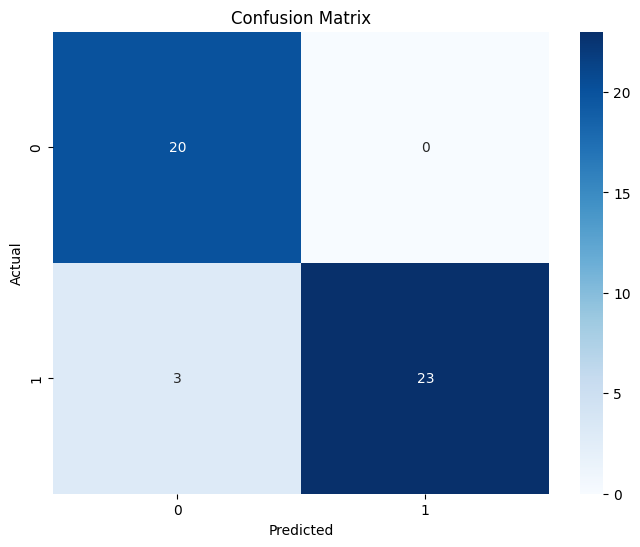

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        20
           1       1.00      0.88      0.94        26

    accuracy                           0.93        46
   macro avg       0.93      0.94      0.93        46
weighted avg       0.94      0.93      0.94        46

Accuracy: 0.9347826086956522


In [159]:
# 6. Calcola la confusion matrix e visualizzala
# Supponiamo che le classi siano "Anomaly" e "Fault"; in base al tuo mapping potresti avere valori numerici o stringhe.
# Se sono numerici e vuoi rinominarli, ad esempio: 0 -> "Normal" (o Unknown), 2 -> "Anomaly", 3 -> "Fault"
# Qui supponiamo che le etichette in Expected e Predicted siano coerenti.
cm = confusion_matrix(df_case_predictions["Expected"], df_case_predictions["Predicted"])
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.sort(df_case_predictions["Expected"].unique()),
            yticklabels=np.sort(df_case_predictions["Expected"].unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 7. Stampa il classification report e l'accuracy
print("Classification Report:")
print(classification_report(df_case_predictions["Expected"], df_case_predictions["Predicted"]))
print("Accuracy:", accuracy_score(df_case_predictions["Expected"], df_case_predictions["Predicted"]))

In [160]:
df_wrong = df_case_predictions[df_case_predictions["Predicted"] != df_case_predictions["Expected"]]
df_wrong

,Case,Predicted,Expected
21,199,0,1
27,205,0,1
33,211,0,1


Creo il dataframe con i test data + predizioni

In [161]:
df_test_aggregated = df_test_aggregated.merge(df_case_predictions.rename(columns={"Predicted": "BinaryCondition"}), 
                                               on="Case", how="left")

# 3. Elimina la colonna "Predicted" (non serve più)
df_test_aggregated = df_test_aggregated.drop(columns=["Predicted", "Expected"])

In [162]:
# Esportare in formato CSV e PKL
df_test_aggregated.to_csv('../dataset/dataframes/df_test_aggregated_with_binary_condition.csv', index=False)
df_test_aggregated.to_pickle('../dataset/dataframes/df_test_aggregated_with_binary_condition.pkl')

Salvo il modello in un file .pkl

In [163]:
import pickle

with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)